In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

In [3]:

folder_path = r"D:\optiver\Optiver\individual_book_train"
files = os.listdir(folder_path)

dataframes = []

for file in files:
    if file.endswith('.csv'):
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        print(df.shape)
        dataframes.append(df)

result = pd.concat(dataframes, ignore_index=True)

print(result)

(917553, 11)
(1507532, 11)
(2103923, 11)
(1318894, 11)
(1646442, 11)
(1176118, 11)
(916480, 11)
(1211011, 11)
(1458517, 11)
(1332512, 11)
(2163072, 11)
(1486891, 11)
(1253566, 11)
(1302560, 11)
(2226361, 11)
(869429, 11)
(1671219, 11)
(1301569, 11)
(1101256, 11)
(1043557, 11)
(1080860, 11)
(2155805, 11)
(1929592, 11)
(1543033, 11)
(2071321, 11)
(2269682, 11)
(1891264, 11)
(1042049, 11)
(1792968, 11)
(2102975, 11)
(1633740, 11)
(885677, 11)
(1514773, 11)
(787399, 11)
(1194665, 11)
(1903140, 11)
(1697158, 11)
(1767345, 11)
(1207074, 11)
(1441081, 11)
(1579367, 11)
(873499, 11)
(1457045, 11)
(2295344, 11)
(1269461, 11)
(952669, 11)
(1834156, 11)
(2131814, 11)
(774671, 11)
(1662840, 11)
(2198813, 11)
(1933622, 11)
(776292, 11)
(1076303, 11)
(1719059, 11)
(1073989, 11)
(1000611, 11)
(2144157, 11)
(1440838, 11)
(2294519, 11)
(2162681, 11)
(1989713, 11)
(2084001, 11)
(1248551, 11)
(981747, 11)
(2148692, 11)
(1703711, 11)
(1696658, 11)
(1446935, 11)
(1116485, 11)
(1945309, 11)
(1066086, 11)
(1

In [9]:
df.head()

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2,stock_id
0,5,0,1.002195,1.002358,1.002032,1.002520,200,513,600,400,99
1,5,1,1.002195,1.002358,1.002032,1.002520,600,113,800,400,99
2,5,2,1.002358,1.002520,1.002195,1.002683,800,128,600,300,99
3,5,3,1.002358,1.002520,1.002195,1.002683,845,105,600,300,99
4,5,4,1.002358,1.002520,1.002195,1.002683,200,405,600,300,99


In [10]:
df["wap1"] = (df["bid_price1"] * df["ask_size1"] + df["ask_price1"] * df["bid_size1"]) / (df["bid_size1"] + df["ask_size1"])
df["wap2"] = (df["bid_price2"] * df["ask_size2"] + df["ask_price2"] * df["bid_size2"]) / (df["bid_size2"] + df["ask_size2"])

In [11]:
log_r1 = [] # list to store log returns
time_ids = df["time_id"].unique()[0:500] # obtaining first 500 time_ids for stock 1

for i in range(len(time_ids)):
    sec = df.loc[df["time_id"] == time_ids[i], "seconds_in_bucket"]
    price = df.loc[df["time_id"] == time_ids[i], "wap1"]
    log_r = np.log(price[1:].values / price[:-1].values)
    log_r1.append(pd.DataFrame({'time': sec[1:], 'log_return': log_r}))
    time_no_change = np.setdiff1d(np.arange(1, 601), log_r1[i]['time'])
    if len(time_no_change) > 0:
        new_df = pd.DataFrame({'time': time_no_change, 'log_return': 0})
        log_r1[i] = pd.concat([log_r1[i], new_df]).sort_values(by='time')
    
    #log_r1[i] = log_r1[i].set_index(['time'])

pd.set_option("display.precision", 10)
pd.options.display.max_rows = 650
log_r1[0]

,time,log_return
1,1,0.0000909562
2,2,0.0001655266
3,3,0.0000044449
4,4,-0.0000906536
5,5,-0.0000133225
6,6,-0.0000044531
7,7,0.0000044531
8,8,0.0000134706
9,9,-0.0003753540
10,10,0.0001319080


In [12]:
# wap1_mean wap2_mean
df['wap1_mean'] = df.groupby(['stock_id'])['wap1'].transform('mean')
df['wap2_mean'] = df.groupby(['stock_id'])['wap2'].transform('mean')



# \market_mean1 \market_mean2
market_mean1 = df.loc[df['time_id'] == 5, 'wap1'].mean()
market_mean2 = df.loc[df['time_id'] == 5, 'wap2'].mean()
df['market_mean1'] = market_mean1
df['market_mean2'] = market_mean2

# Calculate log returns
df['log_return1'] = np.log(df.groupby(['time_id'])['wap1'].pct_change() + 1)


df.dropna(inplace=True)




df = df.loc[:, ['stock_id','time_id', 'wap1', 'wap2', 'wap1_mean', 'wap2_mean','log_return1']]
df

,stock_id,time_id,wap1,wap2,wap1_mean,wap2_mean,log_return1
1,99,5,1.0023317461,1.0023575333,0.9999546372,0.9999550559,0.0000909562
2,99,5,1.0024976724,1.0025201333,0.9999546372,0.9999550559,0.0001655266
3,99,5,1.0025021284,1.0025201333,0.9999546372,0.9999550559,0.0000044449
4,99,5,1.0024112521,1.0025201333,0.9999546372,0.9999550559,-0.0000906536
5,99,5,1.0023978975,1.0024998125,0.9999546372,0.9999550559,-0.0000133225
...,...,...,...,...,...,...,...
1827296,99,32767,0.9997159000,0.9997014353,0.9999546372,0.9999550559,-0.0000642599
1827297,99,32767,0.9997219111,0.9997014353,0.9999546372,0.9999550559,0.0000060128
1827298,99,32767,0.9996888300,0.9996790457,0.9999546372,0.9999550559,-0.0000330909
1827299,99,32767,0.9996786844,0.9996556055,0.9999546372,0.9999550559,-0.0000101488


In [13]:
vol = []
comp_vol = lambda x: np.sqrt(np.sum(np.power(x, 2)))

for i in range(len(log_r1)):
    log_r1[i]['time_bucket'] = np.ceil(log_r1[i]['time'] / 30)
    vol.append(log_r1[i].groupby('time_bucket').agg({'log_return': comp_vol}).reset_index())
    vol[i].columns = ['time_bucket', 'volatility']
    
vol[0]

,time_bucket,volatility
0,1.0,0.0006918249
1,2.0,0.0005954820
2,3.0,0.0005082274
3,4.0,0.0005883644
4,5.0,0.0007095810
5,6.0,0.0004798880
6,7.0,0.0003815354
7,8.0,0.0004077057
8,9.0,0.0003064338
9,10.0,0.0004836210


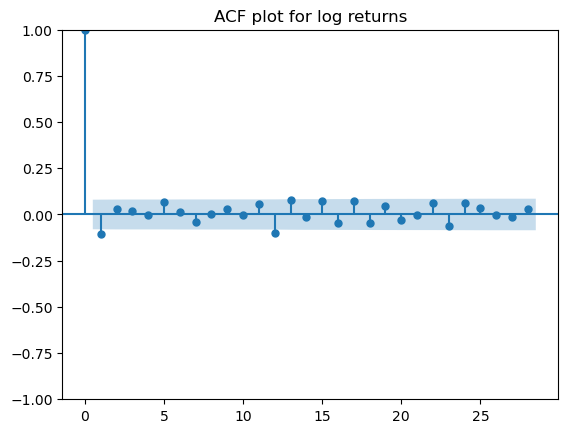

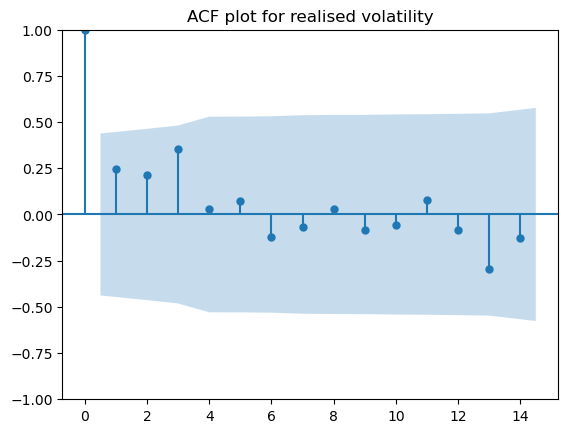

In [14]:
from statsmodels.graphics.tsaplots import plot_acf
# note difference in assumptions for calculating variance:
# https://stackoverflow.com/questions/40578701/acf-confidence-intervals-in-r-vs-python-why-are-they-different 
# python uses Bartlett's formula

# this affects the confidence interval lines hence looks slightly different from lab4 graphs

plot_acf(log_r1[0]['log_return'], title="ACF plot for log returns");
plot_acf(vol[0]["volatility"], title="ACF plot for realised volatility");

In [15]:
import pmdarima as pm
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')

# inspired by https://goldinlocks.github.io/ARCH_GARCH-Volatility-Forecasting/ 
model_results = []
for i in range(len(vol)):

    model = pm.auto_arima(log_r1[i].loc[log_r1[i].time <= 480, "log_return"],
        d=0, # non-seasonal difference order
        start_p=1, # initial guess for p
        start_q=1, # initial guess for q
        max_p=4, # max value of p to test
        max_q=4, # max value of q to test                        

        seasonal=False, # is the time series seasonal

        information_criterion='bic', # used to select best model
        trace=False, # print results whilst training
        error_action='ignore', # ignore orders that don't work
        stepwise=True, # apply intelligent order search
    )
    
    # Fit best model
    arma_model = sm.tsa.SARIMAX(endog=log_r1[i].loc[log_r1[i].time <= 480, "log_return"],order=model.order)
    model_results.append(arma_model.fit())

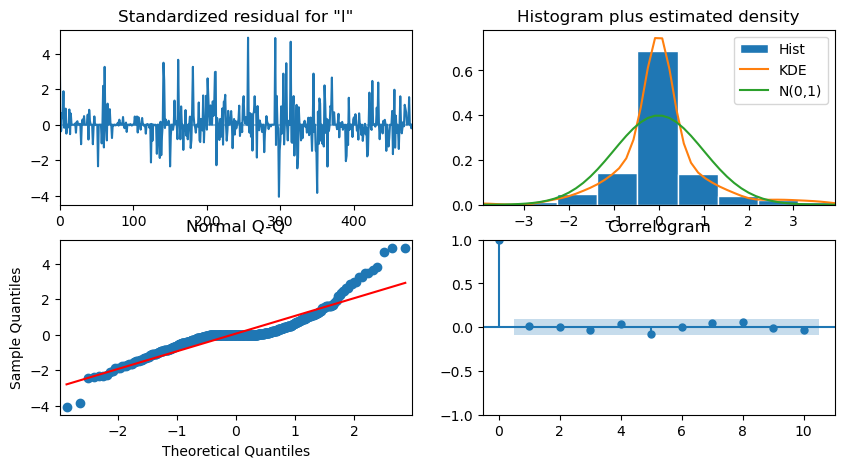

In [16]:
model_results[9].plot_diagnostics(figsize=(10, 5))
plt.show()

In [30]:
# Fit GARCH model with ARMA model residuals
garch_results = []
for i in range(len(vol)):
    garch_model = arch_model(100 * np.asarray(model_results[i].resid), mean='Zero', p=1, q=1, power=0.5)
    garch_results.append(garch_model.fit(disp = 'off'))

D:\ANACONDA\lib\site-packages\arch\univariate\base.py:756: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [ ]:
# Fit an ARMA-GARCH model

model = arch_model(df['log_return1'], vol='Garch', p=1, q=1)
model_fit = model.fit(disp='off')

In [31]:
# Plot GARCH model fitted results
garch_results[11].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Zero Mean - Power GARCH (power: 0.5) Model Results                 
====================================================================================
Dep. Variable:                            y   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.002
Vol Model:         Power GARCH (power: 0.5)   Log-Likelihood:                1337.70
Distribution:                        Normal   AIC:                          -2669.40
Method:                  Maximum Likelihood   BIC:                          -2656.88
                                              No. Observations:                  480
Date:                      Sun, May 14 2023   Df Residuals:                      480
Time:                              18:09:12   Df Model:                            0
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.0131  6.071e-02      0.216      0.829 [ -0.106,  0.132]
alpha[1]       0.0343      0.158      0.218      0.828 [ -0.275,  0.344]
beta[1]        0.8740      0.588      1.486      0.137 [ -0.279,  2.027]
========================================================================

Covariance estimator: robust
"""

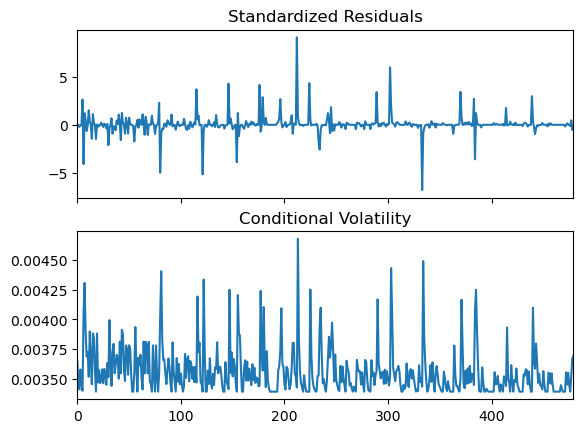

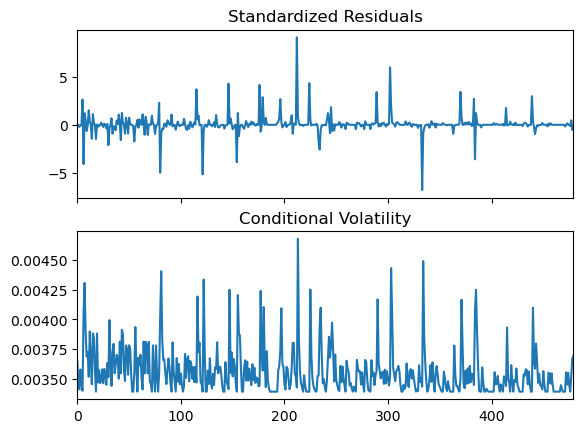

In [32]:
garch_results[1].plot()

In [22]:
# Regression 

In [23]:
import statsmodels.api as sm

# Define your dependent variable (endogenous variable)
Y = df['time_id']

# Define your independent variables (exogenous variables)
# We add a constant to the model as it's a common practice to include a constant in regression model.
X = sm.add_constant(df[['wap1_mean','wap2_mean']])

# Fit the model
model = sm.OLS(Y, X)
results = model.fit()

# Print out the results 
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                time_id   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    -2.084
Date:                Sun, 14 May 2023   Prob (F-statistic):               1.00
Time:                        18:08:14   Log-Likelihood:            -1.9262e+07
No. Observations:             1823471   AIC:                         3.852e+07
Df Residuals:                 1823469   BIC:                         3.852e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
wap1_mean  -5.667e+12   3.31e+12     -1.711      0.0

In [24]:
#rma-garch model which run multiple regression 

In [25]:
from arch.univariate import ARX

# The AR-X-GARCH model 
# ARMA-GARCH model by incorporating exogenous variables
model = ARX(df['time_id'], df[['wap1_mean', 'wap2_mean']])

# fit model
model_fit = model.fit(disp='off')


In [26]:
from arch.univariate import GARCH

# creat a gargh model 
garch = GARCH(p=1, q=1)

# add GARCH in ARMA
model.volatility = garch

# fit model
model_fit = model.fit(disp='off')

In [27]:
print(model_fit)


                          AR-X - GARCH Model Results                          
Dep. Variable:                time_id   R-squared:                      -0.000
Mean Model:                      AR-X   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:           -1.86596e+07
Distribution:                  Normal   AIC:                       3.73193e+07
Method:            Maximum Likelihood   BIC:                       3.73193e+07
                                        No. Observations:              1823471
Date:                Sun, May 14 2023   Df Residuals:                  1823468
Time:                        18:08:22   Df Model:                            3
                                   Mean Model                                  
                  coef    std err          t      P>|t|        95.0% Conf. Int.
-------------------------------------------------------------------------------
Const      -1.2735e+13  2.319e+08 -5.492e+04     

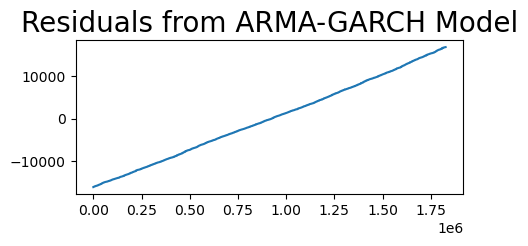

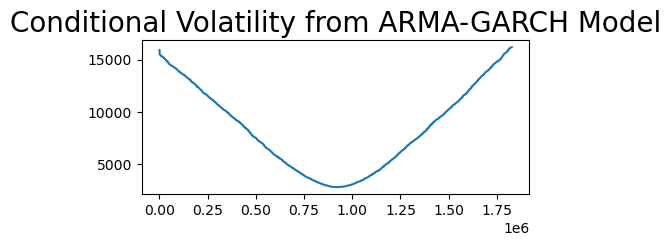

In [28]:
import matplotlib.pyplot as plt

# Plot the residuals
plt.figure(figsize=(5,2))
plt.plot(model_fit.resid)
plt.title('Residuals from ARMA-GARCH Model', fontsize=20)
plt.show()

# Plot the conditional volatility
plt.figure(figsize=(5,2))
plt.plot(model_fit.conditional_volatility)
plt.title('Conditional Volatility from ARMA-GARCH Model', fontsize=20)
plt.show()


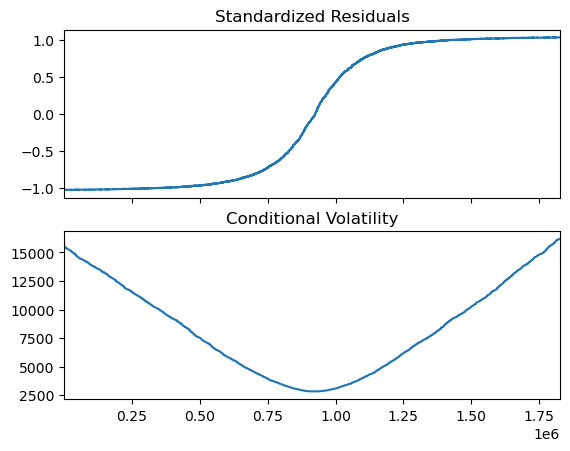

In [29]:
# Generate diagnostic plots
model_fit.plot()
plt.show()